## New qubit based on transmon and fluxonium

In [10]:
import numpy as np
from qutip import*
from matplotlib import pyplot as plt

In [11]:
def phi_op(phi):
    phi_op = np.diag(phi)
    return Qobj(phi_op)

def charge_op(phi):
    dphi = phi[-1]-phi[-2]
    dphi_coeff = -1.0j/(2*dphi)
    n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
    return Qobj(n_op)

In [12]:
#Solve in phase basis
Nphi = 31
Ej = 8
Ec = 0.1
ng = 0
phi = np.linspace(-np.pi,np.pi,2*Nphi+1)

def hamiltonian_CPB(Ec, Ej, ng):
    n = charge_op(phi)
    p = phi_op(phi)
    m = 4*Ec*(n-ng)**2 - Ej*p.cosm()
    return m
energies, wavefunction = hamiltonian_CPB(Ec, Ej, ng).eigenstates()

(-2.0, 16.0)

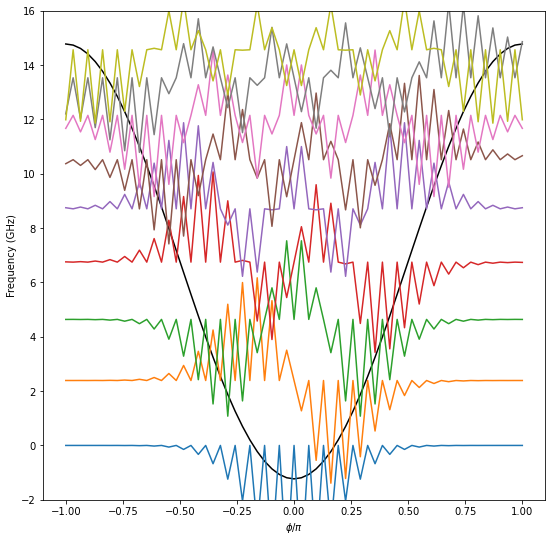

In [13]:
plt.figure(figsize =[9,9])
plt.plot(phi/np.pi, -Ej*np.cos(phi)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0]) 
plt.ylim([-2,16])
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.ylim([-2,16])

In [14]:
def hamiltonian_zak(E_C1, E_J1, E_C2, E_J2, E_L, phi_ext):
    n1 = tensor(charge_op(phi),qeye(2*Nphi+1))
    n2 = tensor(qeye(2*Nphi+1),charge_op(phi))
    p1 = tensor(phi_op(phi),qeye(2*Nphi+1))
    p2 = tensor(qeye(2*Nphi+1),phi_op(phi))
    H = 4*E_C1*n1**2 + 4*E_C2*n2**2 +0.5*E_L*(p1+p2-phi_ext)**2
    - E_J1*p1.cosm() - E_J2*p2.cosm()
    return H

E_C1 = 6
E_J1 = 3
E_C2 = 0.2
E_J2 = 16
E_L = 0.1
phi_ext = 0.5*2*np.pi

energies, wavefunction = hamiltonian_zak(E_C1, E_J1, E_C2, E_J2, E_L, phi_ext).eigenstates()